Necessary libraries imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [ ]:
Loading data

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

View dataset

In [3]:
X.head()
X.describe()
y.value_counts()

1    357
0    212
Name: count, dtype: int64

Visualizing class distribution

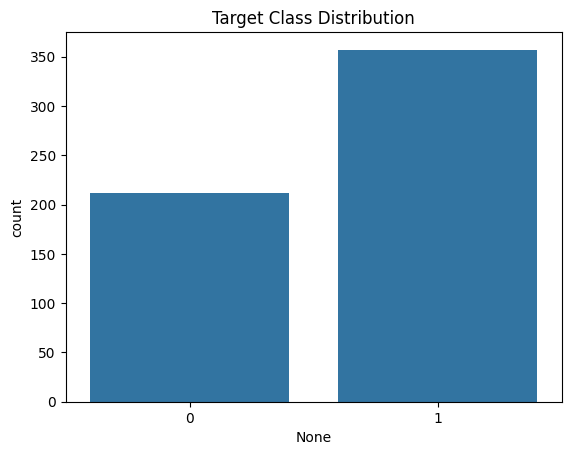

In [4]:
sns.countplot(x=y)
plt.title('Target Class Distribution')
plt.show()

Training and testing data split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building PipELINE WITH GRID
DECISION TREE

In [6]:
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_dt = {
    'clf__max_depth': [3, 5, 10, None],
    'clf__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(pipe_dt, param_grid=param_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [3, 5, 10, None],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

RANDOM FOREST

In [7]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_rf = {
    'clf__n_estimators': [50, 100, 150],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid=param_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [None, 10, 20],
                         'clf__min_samples_split': [2, 5],
                         'clf__n_estimators': [50, 100, 150]},
             scoring='accuracy')

SVM

In [9]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

param_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(pipe_svm, param_grid=param_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 1, 10],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'rbf']},
             scoring='accuracy')

Evaluating the model

In [10]:
models = {
    'Decision Tree': grid_dt,
    'Random Forest': grid_rf,
    'SVM': grid_svm
}

for name, model in models.items():
    print(f"\n{name} Classification Report:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[39  4]
 [ 2 69]]
Accuracy: 0.9473684210526315

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]
Accuracy: 0.9649122807017544

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43

Choosing and Saving the Model

In [11]:
best_model = max(models.items(), key=lambda x: x[1].score(X_test, y_test))[1]

In [12]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']